# Data Preparation
> Following is the breif summary of various data types accruired from EOS printer during printing.
The data was provided by AMEXCI AB, Sweden.

![input_data](Input_Data.PNG)

In [1]:
import rawpy
import imageio
import numpy as np
from os import walk
import time
import matplotlib
from matplotlib import pyplot as plt
import cv2  #OpenCV 
import os
import glob
import pandas as pd
import regex as re
import h5py
import imutils #use to rotate images
from keras.preprocessing.image import ImageDataGenerator

__Global Variables__

In [39]:
PB_Path = "D:/UoH_PhD_Exp/Data/Surface_Deformation/Powder_bed_data/"
OT_Path = "D:/UoH_PhD_Exp/Data/Surface_Deformation/OT_data/"
SD_Path = "D:/UoH_PhD_Exp/Data/Surface_Deformation/"

## Part Statistics
![Data_exp](Part_State.PNG)

In [10]:
part_stats_df = pd.read_csv(os.path.join(SD_Path,"SI373220200424002449_PartStatistics_all.csv"), delimiter='\t')
part_stats_df.head(5)

,JO_ID,JO_IID,LA_INDEX,LA_ZHEIGHT (µm),P_PARTID,P_NAME,PS_EXPOSURE_AREA (px),PS_EXPOSURE_INTEGRAL (GV),PS_MEAN (GV),PS_MINIMUM (GV),PS_MAXIMUM (GV),PS_STDDEV (GV),OC_ID,AP_ID
0,SI373220200424002449,1235,0,30,1,Surface Deformation_1_cut_2,4012.0,3053502.23,761.09,0.0,1485.98,225.94,1029,1006
1,SI373220200424002449,1235,0,30,2,Surface Deformation_1_cut_2-Copy-1,4006.0,2973809.89,742.34,0.0,1751.02,201.15,1029,1006
2,SI373220200424002449,1235,0,30,3,Surface Deformation_1_cut_2-Copy-2,4006.0,3278803.44,818.47,0.0,1481.97,219.52,1029,1006
3,SI373220200424002449,1235,0,30,4,Surface Deformation_1_cut_2-Copy-5,4025.0,3529860.51,876.98,0.0,1695.81,241.05,1029,1006
4,SI373220200424002449,1235,0,30,5,Surface Deformation_1_cut_2-Copy-4,4011.0,3607296.66,899.35,0.0,1639.54,235.60,1029,1006


In [11]:
laser_exposure_df = part_stats_df[['LA_INDEX','P_PARTID','PS_EXPOSURE_AREA (px)', 'PS_EXPOSURE_INTEGRAL (GV)','PS_MEAN (GV)', 'PS_MINIMUM (GV)', 'PS_MAXIMUM (GV)']]
laser_exposure_df.head()

,LA_INDEX,P_PARTID,PS_EXPOSURE_AREA (px),PS_EXPOSURE_INTEGRAL (GV),PS_MEAN (GV),PS_MINIMUM (GV),PS_MAXIMUM (GV)
0,0,1,4012.0,3053502.23,761.09,0.0,1485.98
1,0,2,4006.0,2973809.89,742.34,0.0,1751.02
2,0,3,4006.0,3278803.44,818.47,0.0,1481.97
3,0,4,4025.0,3529860.51,876.98,0.0,1695.81
4,0,5,4011.0,3607296.66,899.35,0.0,1639.54


>The test specimen was consisted of thirteen (13) parts. Here we are grouping the laser exposure based on each parts. Later we will visualise the number of pixels exposed in each layer during printing of each sub part.

In [12]:
grouped = laser_exposure_df.groupby(laser_exposure_df.P_PARTID)
part1_df = grouped.get_group(1)
part2_df = grouped.get_group(2)
part3_df = grouped.get_group(3)
part4_df = grouped.get_group(4)
part5_df = grouped.get_group(5)
part6_df = grouped.get_group(6)
part7_df = grouped.get_group(7)
part8_df = grouped.get_group(8)
part9_df = grouped.get_group(9)
part10_df = grouped.get_group(10)
part11_df = grouped.get_group(11)
part12_df = grouped.get_group(12)
part13_df = grouped.get_group(13)
part1_df.head()

,LA_INDEX,P_PARTID,PS_EXPOSURE_AREA (px),PS_EXPOSURE_INTEGRAL (GV),PS_MEAN (GV),PS_MINIMUM (GV),PS_MAXIMUM (GV)
0,0,1,4012.0,3053502.23,761.09,0.00,1485.98
13,1,1,4019.0,7597503.80,1890.40,184.36,3433.59
26,2,1,4016.0,7249290.13,1805.10,250.37,3037.99
39,3,1,4012.0,9387160.29,2339.77,526.63,4291.03
52,4,1,4012.0,9995903.18,2491.50,320.43,3943.03


<AxesSubplot:xlabel='LA_INDEX'>

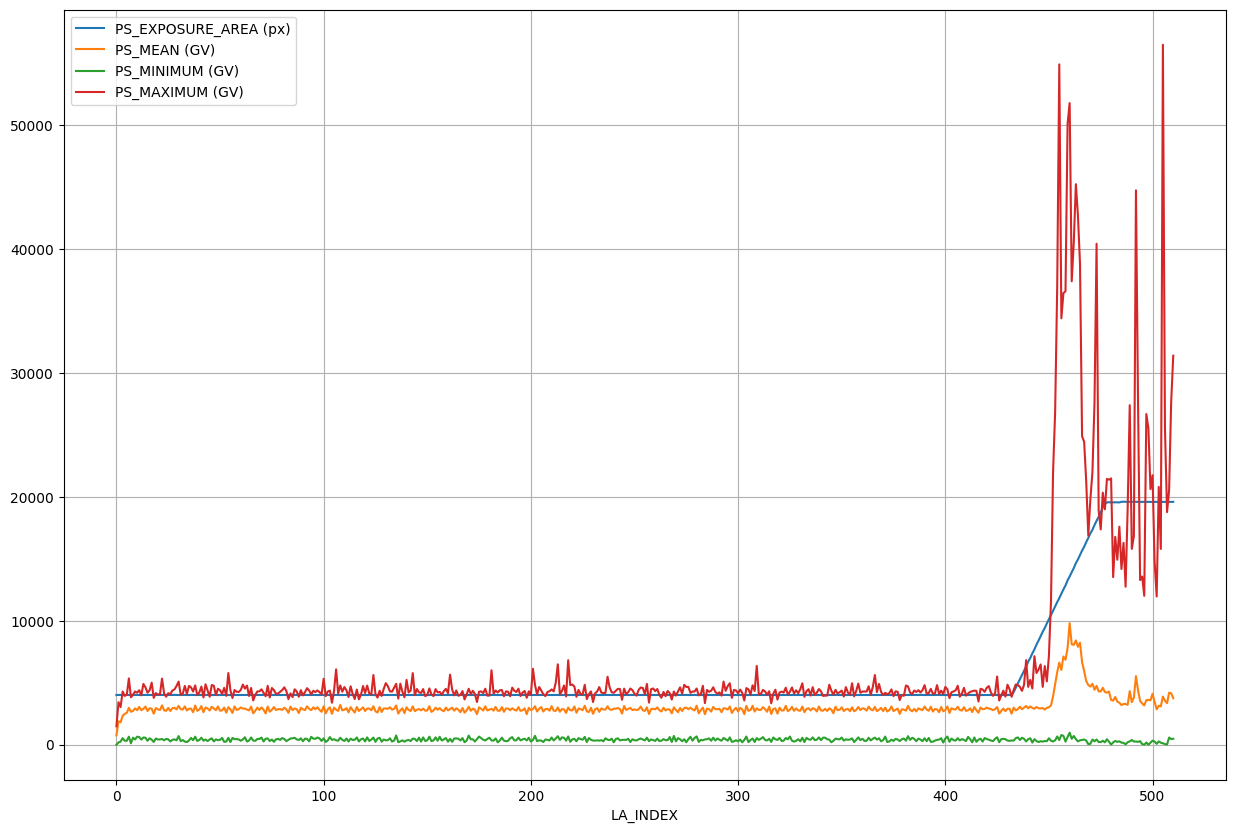

In [13]:
part1_df.plot(x="LA_INDEX", y=["PS_EXPOSURE_AREA (px)", "PS_MEAN (GV)", 'PS_MINIMUM (GV)', 'PS_MAXIMUM (GV)'], figsize=(15,10), grid=True)

<AxesSubplot:xlabel='LA_INDEX'>

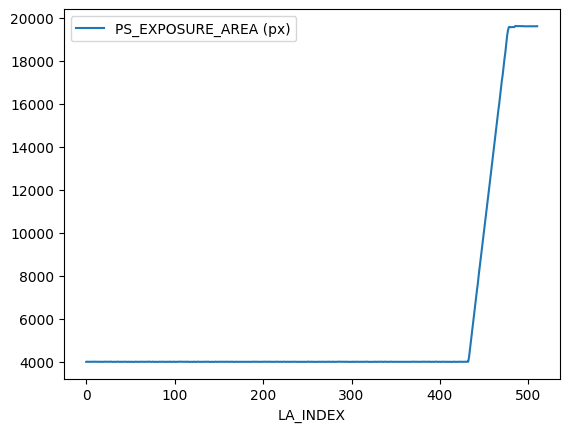

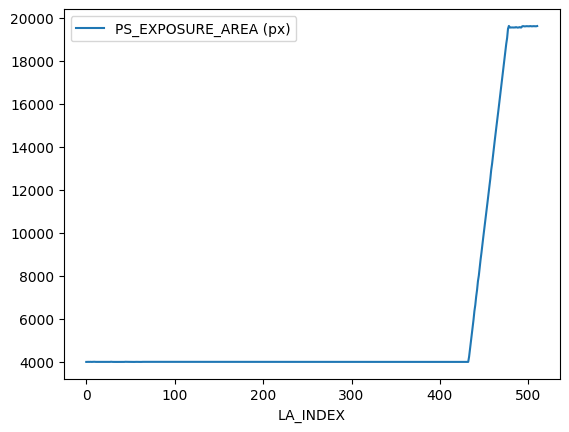

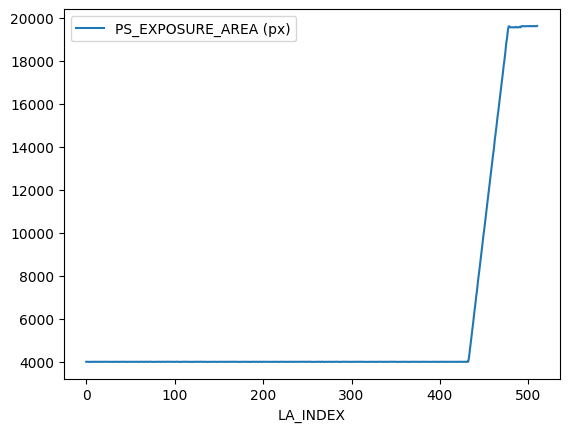

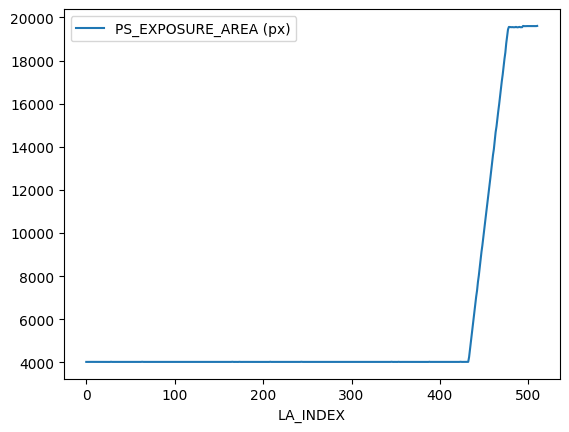

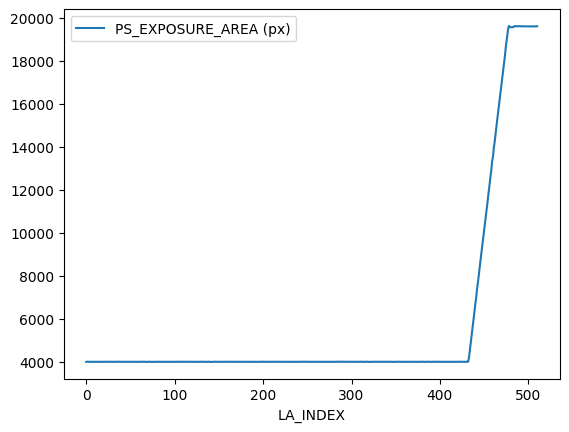

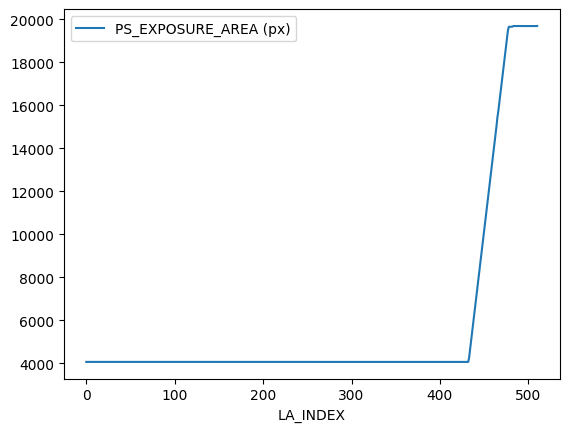

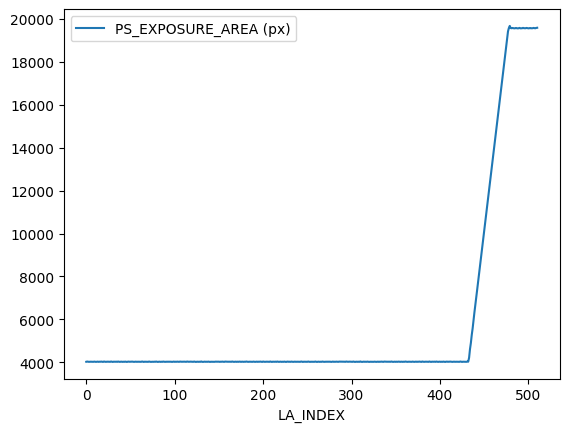

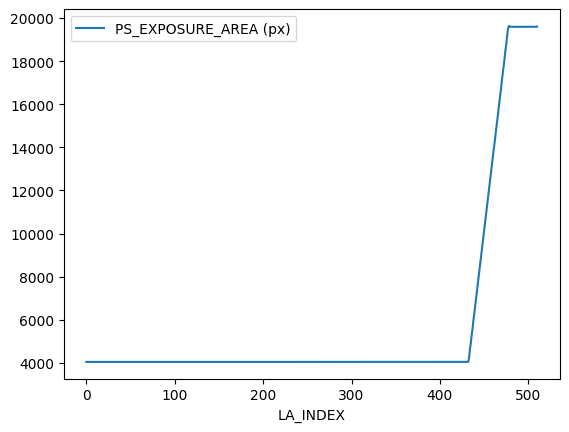

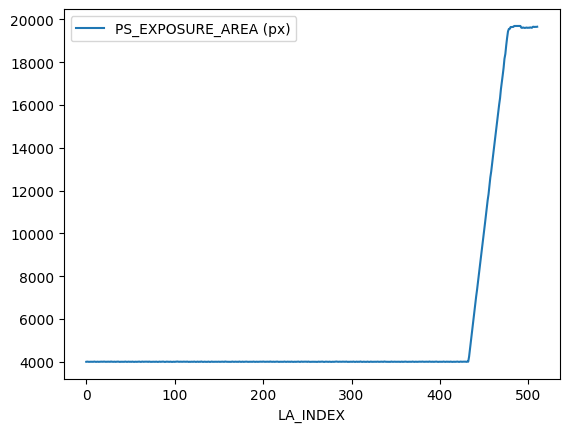

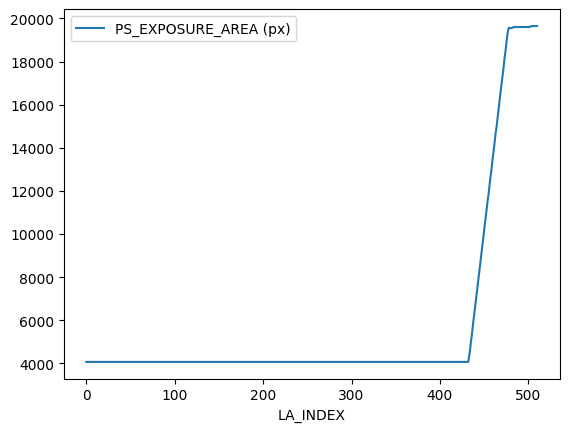

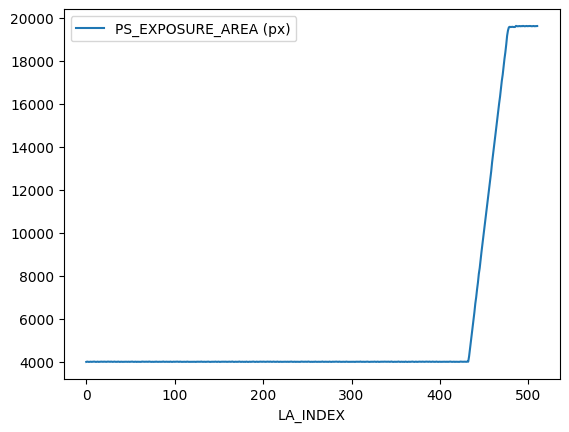

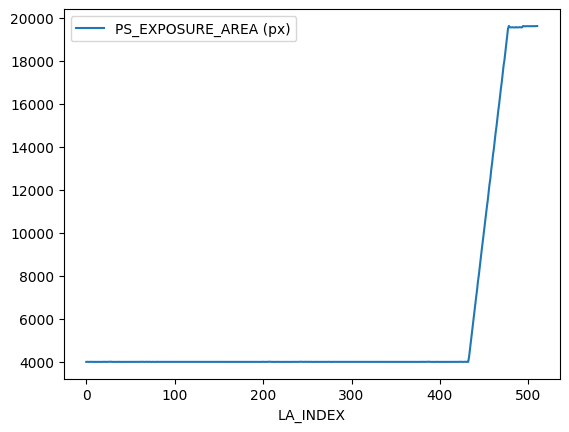

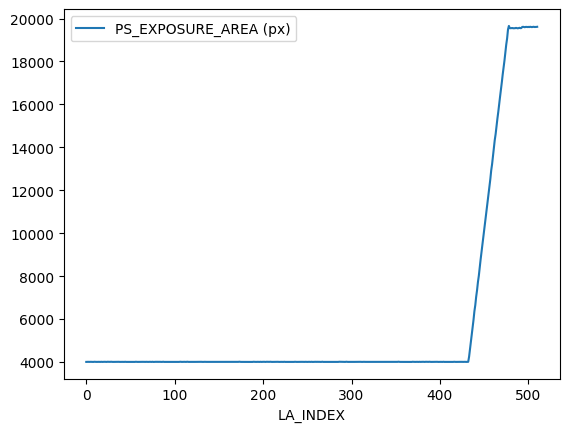

In [14]:
part1_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part2_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part3_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part4_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part5_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part6_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part7_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part8_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part9_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part10_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part11_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part12_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")
part13_df.plot(x="LA_INDEX", y="PS_EXPOSURE_AREA (px)")

# Indication CSV
![Data_exp](Indications.PNG)

In [15]:
indications_df = pd.read_csv(os.path.join(SD_Path,"indication.csv"),  header=None)
indications_df.columns = ["JOB_ID", "JO_IID", "LAYER_ID", "LAYER_HEIGHT","PART_ID","PART_NAME","IND_STATUS","OP_ID","IND_OP_VALUE","IND_CLASS_SEVERITY",
                      "IND_CLASS_CERTAINTY","IND_START_X","IND_START_Y","IND_END_X","IND_END_Y","IND_CENTER_X","IND_CENTER_Y","IND_AREA","IND_EXTEND",
                      "IND_MEAN","IND_MINIMIM","IND_MAXIMUM","U_ID","IMG:ID","IND_REMARK","OC_ID","AP_ID"]

In [16]:
indications_df.head()

,JOB_ID,JO_IID,LAYER_ID,LAYER_HEIGHT,PART_ID,PART_NAME,IND_STATUS,OP_ID,IND_OP_VALUE,IND_CLASS_SEVERITY,...,IND_AREA,IND_EXTEND,IND_MEAN,IND_MINIMIM,IND_MAXIMUM,U_ID,IMG:ID,IND_REMARK,OC_ID,AP_ID
0,Job_ID,JO_IID,LAYER_ID,LAYER_HEIGHT,PART_ID,PART_NAME,IND_STATUS,OP_ID,IND_OP_VALUE,IND_CLASS_SEVERITY,...,IND_AREA,IND_EXTEND,IND_MEAN,IND_MINIMIM,IND_MAXIMUM,U_ID,IMG:ID,IND_REMARK,OC_ID,AP_ID
1,SI373220200409013558,1232,3,120,62,Alu_Merge_of_kit-box-benchmark_Box_Rescaled(0....,1,472579,0,NaN,...,68,12,5217.18,4554.27,5790.73,NaN,NaN,NaN,1031,1006
2,SI373220200327040204,1230,1,60,1,surface roughness_cut_2,1,469524,0,NaN,...,30762.5,201.05,2336.04,1439.83,4077.13,NaN,NaN,NaN,1031,1006
3,SI373220200327040204,1230,1,60,2,surface roughness_cut_2-Copy-1,1,469524,0,NaN,...,31236.5,202.76,2349.36,1541.66,4063.52,NaN,NaN,NaN,1031,1006
4,SI373220200327040204,1230,1,60,3,surface roughness_cut_2-Copy-2,1,469524,0,NaN,...,30775,201.55,2715.42,1847.02,4576.67,NaN,NaN,NaN,1031,1006


In [17]:
indications_df.shape

(15273, 27)

In [18]:
some_value = ["Surface Deformation_1_cut_2-Copy-9",
              "Surface Deformation_1_cut_2-Copy-2",
              "Surface Deformation_1_cut_2",
              "Surface Deformation_1_cut_2-Copy-5",
              "Surface Deformation_1_cut_2-Copy-1",
              "Surface Deformation_1_cut_2-Copy-7",
              "Surface Deformation_1_cut_2-Copy-11",
              "Surface Deformation_1_cut_2-Copy-4",
              "Surface Deformation_1_cut_2-Copy-6",
              "Surface Deformation_1_cut_2-Copy-10",
              "Surface Deformation_1_cut_2-Copy-12",
              "Surface Deformation_1_cut_2-Copy-3",
              "Surface Deformation_1_cut_2-Copy-8"]
indications_df = indications_df.loc[indications_df['PART_NAME'].isin(some_value)]

In [19]:
#indications_df = indications_df.drop(["OP_ID","IND_OP_VALUE","IND_CLASS_SEVERITY","IND_CLASS_CERTAINTY","U_ID","IMG:ID","IND_REMARK"],axis=1)

In [20]:
indications_df.shape

(2340, 27)

In [21]:
indications_df.describe()

,JOB_ID,JO_IID,LAYER_ID,LAYER_HEIGHT,PART_ID,PART_NAME,IND_STATUS,OP_ID,IND_OP_VALUE,IND_CLASS_SEVERITY,...,IND_AREA,IND_EXTEND,IND_MEAN,IND_MINIMIM,IND_MAXIMUM,U_ID,IMG:ID,IND_REMARK,OC_ID,AP_ID
count,2340,2340,2340,2340,2340,2340,2340,2340,2340,0,...,2340,2340,2340,2340,2340,0,0,0,2340,2340
unique,1,1,71,71,13,13,1,150,1,0,...,681,730,2340,2329,2111,0,0,0,3,1
top,SI373220200424002449,1235,460,13830,13,Surface Deformation_1_cut_2-Copy-9,1,474708,0,NaN,...,174,17,7206.03,3289.04,62155.75,NaN,NaN,NaN,1026,1006
freq,2340,2340,81,81,263,263,2340,58,2340,NaN,...,1062,1062,1,2,3,NaN,NaN,NaN,1766,2340


In [22]:
print(indications_df["JOB_ID"].unique())

['SI373220200424002449']


In [23]:
print(indications_df["JO_IID"].unique())

['1235']


In [24]:
defected_layers = indications_df["LAYER_ID"].unique()

defected_layers.sort()
print(defected_layers)

['1' '11' '3' '4' '443' '447' '448' '449' '450' '451' '452' '453' '454'
 '455' '456' '457' '458' '459' '460' '461' '462' '463' '464' '465' '466'
 '467' '468' '469' '470' '471' '472' '473' '474' '475' '476' '477' '478'
 '479' '480' '481' '482' '483' '484' '485' '486' '487' '488' '489' '490'
 '491' '492' '493' '494' '495' '496' '497' '498' '499' '5' '500' '501'
 '502' '503' '504' '505' '506' '507' '6' '7' '8' '9']


In [25]:
print(indications_df["PART_ID"].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13']


In [26]:
print(indications_df["PART_NAME"].unique())

['Surface Deformation_1_cut_2' 'Surface Deformation_1_cut_2-Copy-1'
 'Surface Deformation_1_cut_2-Copy-2' 'Surface Deformation_1_cut_2-Copy-5'
 'Surface Deformation_1_cut_2-Copy-4' 'Surface Deformation_1_cut_2-Copy-3'
 'Surface Deformation_1_cut_2-Copy-12'
 'Surface Deformation_1_cut_2-Copy-8' 'Surface Deformation_1_cut_2-Copy-7'
 'Surface Deformation_1_cut_2-Copy-6'
 'Surface Deformation_1_cut_2-Copy-11'
 'Surface Deformation_1_cut_2-Copy-10'
 'Surface Deformation_1_cut_2-Copy-9']
